# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fraud_dataset_raw.csv')

df.head()

,amount,browser,channel,customer_age,date,fraud,ip,isp,latitude,loginTime,...,onceoff_vs_beneficiary,os,paymentType,region,rtc_indicator,to_acc_volume,to_bank,txn_timestamp,uuid,transactor_id
0,120000.0,Chrome_Some(66),channel_B,51.0,2018-06-01,0.0,102.253.144.146,TelkomInternet,-29.0,2018-06-01T19:27:21.000Z,...,B,Windows_Some(7),F,ZA_null,0,18.0,FNBRMB,2018-06-01T19:46:21.000Z,NaN,9150237.0
1,1250.0,Chrome_Some(89),channel_B,26.0,2021-04-07,0.0,197.89.21.227,OPTINET,-26.3811,2021-04-07T16:10:10.000Z,...,B,Windows_Some(7),F,ZA_GP,0,21.0,FNBRMB,2021-04-07T16:13:39.000Z,NaN,13643308.0
2,200.0,Chrome_Some(75),channel_B,82.0,2019-07-31,0.0,169.0.104.125,AFRIHOSTOTHER,-26.3811,2019-07-31T14:31:35.000Z,...,B,Windows_Some(10),F,ZA_GP,0,6.0,FNBRMB,2019-07-31T14:41:47.000Z,NaN,74589.0
3,30.0,Chrome_Some(77),channel_B,37.0,2021-04-13,0.0,34.252.239.0,Amazoncom,53.3382,2021-04-13T21:12:38.000Z,...,O,Windows_Some(10),F,outside_ZA,0,421418.0,FNBRMB,2021-04-13T21:13:18.000Z,NaN,8776804.0
4,150.0,Chrome_Some(77),channel_B,32.0,2021-09-25,0.0,3.250.216.92,Amazoncom,53.3382,2021-09-25T21:05:45.000Z,...,O,Windows_Some(10),F,outside_ZA,0,160201.0,FNBRMB,2021-09-25T21:06:13.000Z,NaN,7653360.0


# Basic Information

In [2]:
print("Dataset shape:", df.shape)
df.info()
df.describe()

Dataset shape: (53420, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53420 entries, 0 to 53419
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   amount                  53420 non-null  float64
 1   browser                 43213 non-null  object 
 2   channel                 53420 non-null  object 
 3   customer_age            53157 non-null  float64
 4   date                    53420 non-null  object 
 5   fraud                   53420 non-null  float64
 6   ip                      43213 non-null  object 
 7   isp                     43213 non-null  object 
 8   latitude                43213 non-null  object 
 9   loginTime               43213 non-null  object 
 10  longitude               43213 non-null  object 
 11  lut_first_paid_date     40001 non-null  object 
 12  lut_last_paid_date      40001 non-null  object 
 13  minute_of_day           53420 non-null  float64
 14  onceoff_vs_

,amount,customer_age,fraud,minute_of_day,rtc_indicator,to_acc_volume,uuid,transactor_id
count,5.342000e+04,53157.000000,53420.000000,53420.000000,53420.000000,5.342000e+04,0.0,5.342000e+04
mean,8.129677e+03,45.984687,0.064021,716.935923,0.040565,8.414774e+04,NaN,1.273563e+07
std,6.521779e+04,26.811421,0.244793,415.344481,0.197283,2.159379e+05,NaN,7.536294e+07
min,1.800000e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,1.736000e+03
25%,3.108925e+02,31.000000,0.000000,355.000000,0.000000,1.000000e+01,NaN,2.462684e+06
50%,1.100000e+03,48.000000,0.000000,717.000000,0.000000,1.040000e+02,NaN,5.191519e+06
75%,3.825000e+03,68.000000,0.000000,1074.000000,0.000000,2.621800e+04,NaN,9.951466e+06
max,8.000000e+06,99.000000,1.000000,1439.000000,1.000000,1.883463e+06,NaN,1.108927e+09


# Drop uuid column

In [3]:
df = df.drop(columns=['uuid'])

# Fill missing categorical columns with "Unknown"

In [4]:
cat_cols = ['browser', 'ip', 'isp', 'os', 'region', 'to_bank']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Fill missing customer_age with median

In [5]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

# Fill missing lut_first_paid_date, lut_last_paid_date with a placeholder

In [6]:
df['lut_first_paid_date'] = df['lut_first_paid_date'].fillna('1970-01-01')
df['lut_last_paid_date'] = df['lut_last_paid_date'].fillna('1970-01-01')

# Convert object columns to datetime

In [7]:
date_cols = ['date','loginTime','lut_first_paid_date','lut_last_paid_date','txn_timestamp']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert latitude and longitude to float

In [8]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Check Updated table

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53420 entries, 0 to 53419
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   amount                  53420 non-null  float64            
 1   browser                 53420 non-null  object             
 2   channel                 53420 non-null  object             
 3   customer_age            53420 non-null  float64            
 4   date                    53420 non-null  datetime64[ns]     
 5   fraud                   53420 non-null  float64            
 6   ip                      53420 non-null  object             
 7   isp                     53420 non-null  object             
 8   latitude                42311 non-null  float64            
 9   loginTime               43213 non-null  datetime64[ns, UTC]
 10  longitude               42311 non-null  float64            
 11  lut_first_paid_date     40001 non-null  d

In [10]:
df.head()

,amount,browser,channel,customer_age,date,fraud,ip,isp,latitude,loginTime,...,minute_of_day,onceoff_vs_beneficiary,os,paymentType,region,rtc_indicator,to_acc_volume,to_bank,txn_timestamp,transactor_id
0,120000.0,Chrome_Some(66),channel_B,51.0,2018-06-01,0.0,102.253.144.146,TelkomInternet,-29.0000,2018-06-01 19:27:21+00:00,...,621.0,B,Windows_Some(7),F,ZA_null,0,18.0,FNBRMB,2018-06-01 19:46:21+00:00,9150237.0
1,1250.0,Chrome_Some(89),channel_B,26.0,2021-04-07,0.0,197.89.21.227,OPTINET,-26.3811,2021-04-07 16:10:10+00:00,...,819.0,B,Windows_Some(7),F,ZA_GP,0,21.0,FNBRMB,2021-04-07 16:13:39+00:00,13643308.0
2,200.0,Chrome_Some(75),channel_B,82.0,2019-07-31,0.0,169.0.104.125,AFRIHOSTOTHER,-26.3811,2019-07-31 14:31:35+00:00,...,1067.0,B,Windows_Some(10),F,ZA_GP,0,6.0,FNBRMB,2019-07-31 14:41:47+00:00,74589.0
3,30.0,Chrome_Some(77),channel_B,37.0,2021-04-13,0.0,34.252.239.0,Amazoncom,53.3382,2021-04-13 21:12:38+00:00,...,78.0,O,Windows_Some(10),F,outside_ZA,0,421418.0,FNBRMB,2021-04-13 21:13:18+00:00,8776804.0
4,150.0,Chrome_Some(77),channel_B,32.0,2021-09-25,0.0,3.250.216.92,Amazoncom,53.3382,2021-09-25 21:05:45+00:00,...,1093.0,O,Windows_Some(10),F,outside_ZA,0,160201.0,FNBRMB,2021-09-25 21:06:13+00:00,7653360.0


In [11]:
df.isnull().sum()

amount                        0
browser                       0
channel                       0
customer_age                  0
date                          0
fraud                         0
ip                            0
isp                           0
latitude                  11109
loginTime                 10207
longitude                 11109
lut_first_paid_date       13419
lut_last_paid_date        13419
minute_of_day                 0
onceoff_vs_beneficiary        0
os                            0
paymentType                   0
region                        0
rtc_indicator                 0
to_acc_volume                 0
to_bank                       0
txn_timestamp                 0
transactor_id                 0
dtype: int64

In [12]:
for col in cat_cols:
    print(col, df[col].unique())

browser ['Chrome_Some(66)' 'Chrome_Some(89)' 'Chrome_Some(75)' 'Chrome_Some(77)'
 'Chrome_Some(49)' 'Chrome_Some(64)' 'Chrome_Some(86)' 'Edge_Some(86)'
 'Chrome_Some(90)' 'Chrome_Some(87)' 'IE_Some(11)' 'Chrome_Some(79)'
 'Edge_Some(12)' 'Unknown' 'Chrome_Some(88)' 'Firefox_Some(48)'
 'Chrome_Some(94)' 'Chrome_Some(69)' 'Chrome_Some(37)' 'Chrome_Some(68)'
 'Chrome_Some(57)' 'Mobile_Safari_Some(12)' 'Edge_Some(88)'
 'Chrome_Some(92)' 'HeadlessChrome_Some(77)' 'Chrome_Some(93)'
 'Chrome_Some(65)' 'Edge_Some(89)' 'Firefox_Some(66)' 'Firefox_Some(92)'
 'Chrome_Some(48)' 'Chrome_Some(76)' 'Chrome_Some(83)' 'Chrome_Some(74)'
 'HeadlessChrome_Some(66)' 'Chrome_Some(73)' 'Firefox_Some(90)'
 'Firefox_Some(70)' 'Other_None' 'Chrome_Some(78)' 'Chrome_Some(70)'
 'Safari_Some(13)' 'Safari_Some(12)' 'Firefox_Some(52)'
 'Mobile_Safari_Some(9)' 'Chrome_Some(67)' 'Firefox_Some(67)'
 'Firefox_Some(65)' 'Firefox_Some(91)' 'Maxthon_Some(4)' 'Edge_Some(16)'
 'Firefox_Some(64)' 'Chrome_Some(85)' 'Chrome_Som

In [13]:
df.describe()

,amount,customer_age,date,fraud,latitude,longitude,minute_of_day,rtc_indicator,to_acc_volume,transactor_id
count,5.342000e+04,53420.000000,53420,53420.000000,42311.000000,42311.000000,53420.000000,53420.000000,5.342000e+04,5.342000e+04
mean,8.129677e+03,45.994609,2020-04-20 13:26:12.354923264,0.064021,-16.701367,21.631408,716.935923,0.040565,8.414774e+04,1.273563e+07
min,1.800000e-01,0.000000,2018-01-01 00:00:00,0.000000,-46.388800,-123.129100,0.000000,0.000000,0.000000e+00,1.736000e+03
25%,3.108925e+02,31.000000,2019-06-19 00:00:00,0.000000,-29.855600,18.481100,355.000000,0.000000,1.000000e+01,2.462684e+06
50%,1.100000e+03,48.000000,2020-07-02 00:00:00,0.000000,-26.381100,27.837600,717.000000,0.000000,1.040000e+02,5.191519e+06
75%,3.825000e+03,68.000000,2021-04-16 06:00:00,0.000000,-25.759900,28.260400,1074.000000,0.000000,2.621800e+04,9.951466e+06
max,8.000000e+06,99.000000,2021-11-01 00:00:00,1.000000,65.000000,175.045000,1439.000000,1.000000,1.883463e+06,1.108927e+09
std,6.521779e+04,26.745710,NaN,0.244793,28.951407,14.587439,415.344481,0.197283,2.159379e+05,7.536294e+07


# Exploratory Data Analysis (EDA)

## Target Variable Analysis

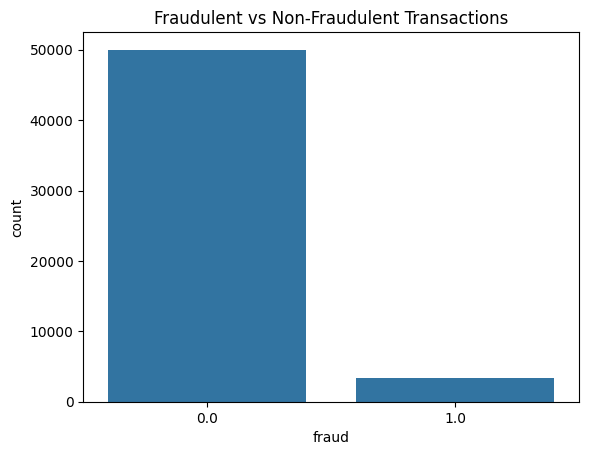

fraud
0.0    93.597903
1.0     6.402097
Name: proportion, dtype: float64

In [14]:
sns.countplot(x='fraud', data=df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')

plt.savefig('fraud_countplot.png', dpi=300, bbox_inches='tight')
plt.show()

df['fraud'].value_counts(normalize=True) * 100

## Numerical Features Analysis

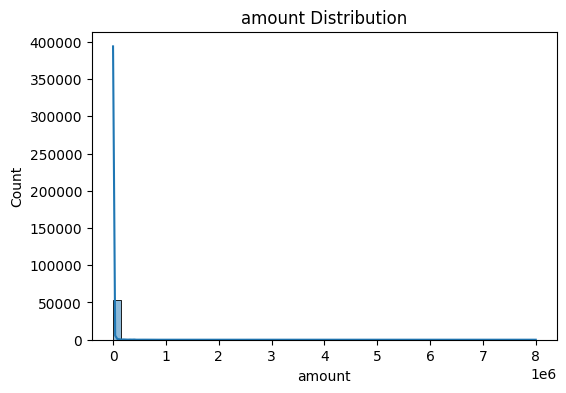

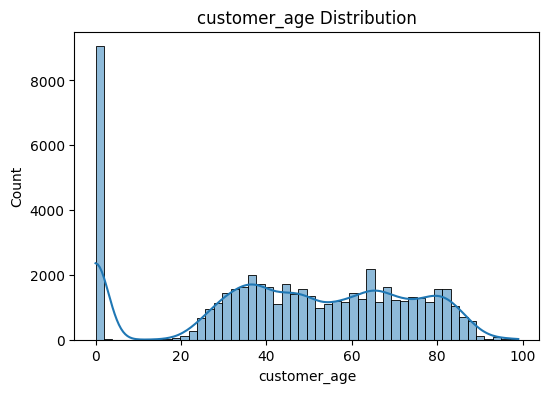

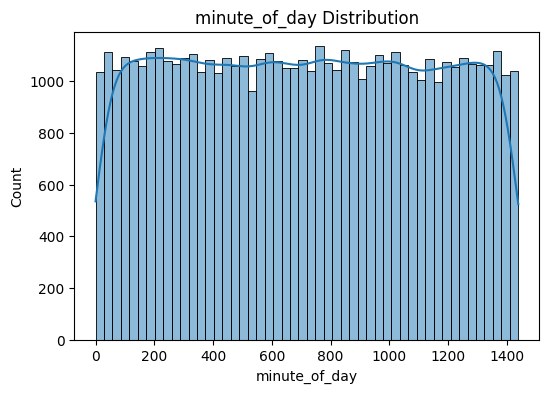

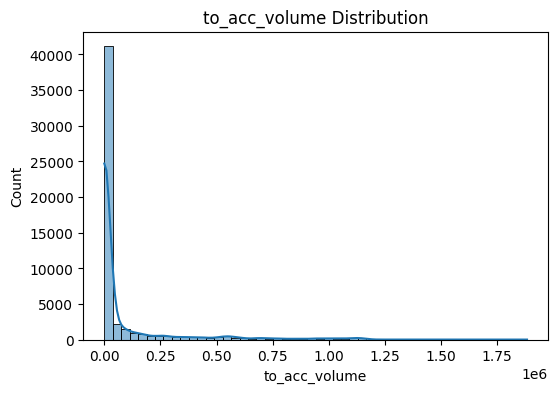

In [15]:
num_cols = ['amount', 'customer_age', 'minute_of_day', 'to_acc_volume']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'{col} Distribution')

    plt.savefig(f'{col}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

## Categorical Features Analysis

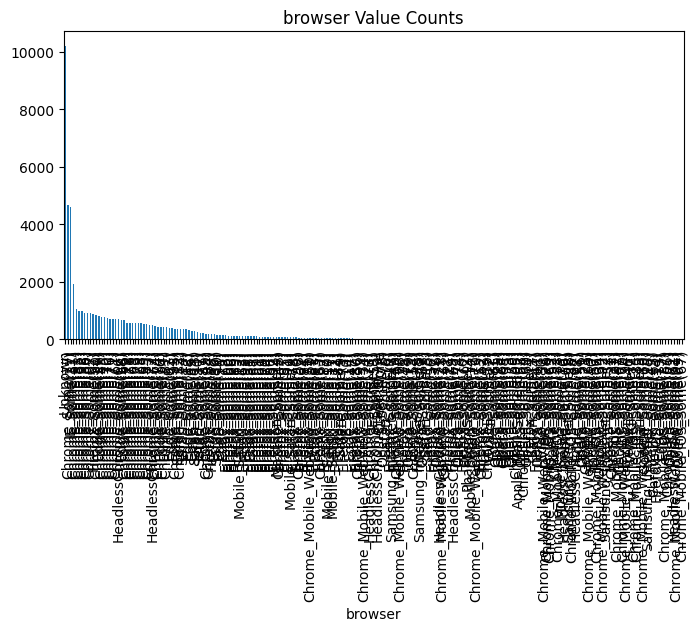

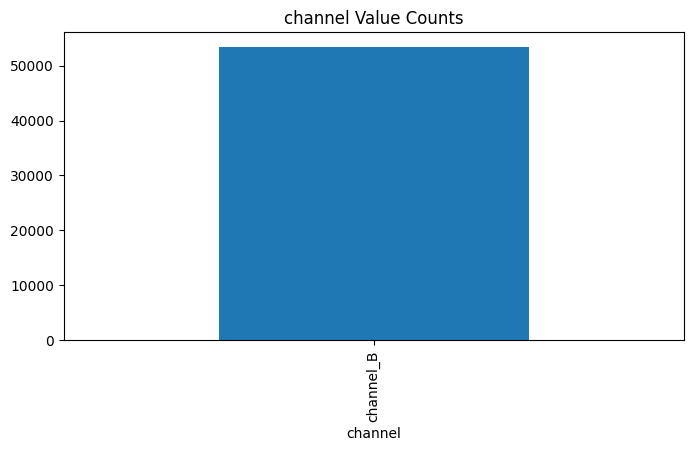

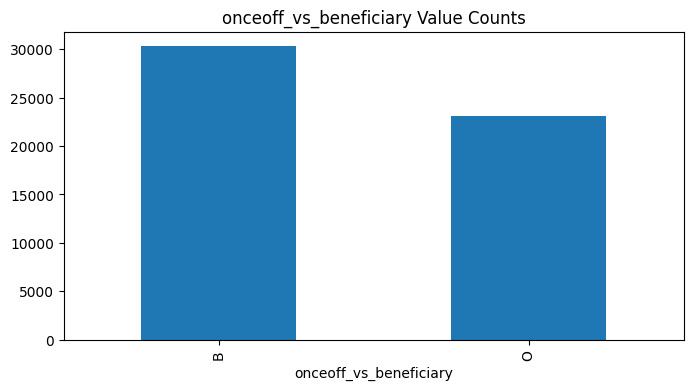

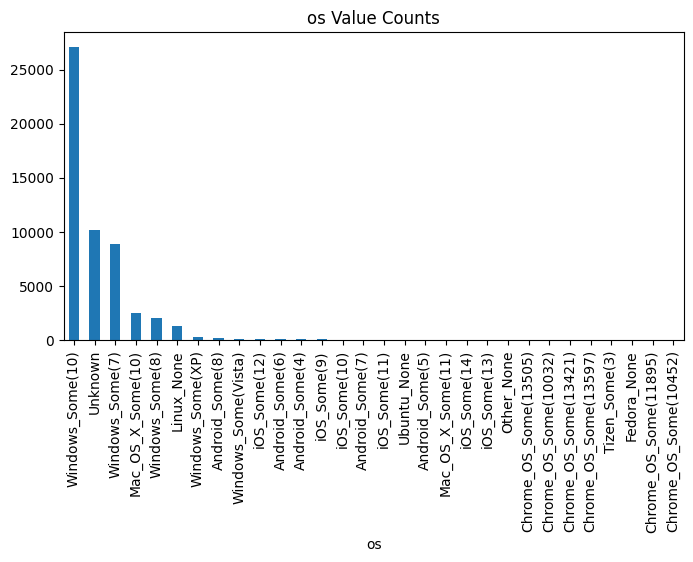

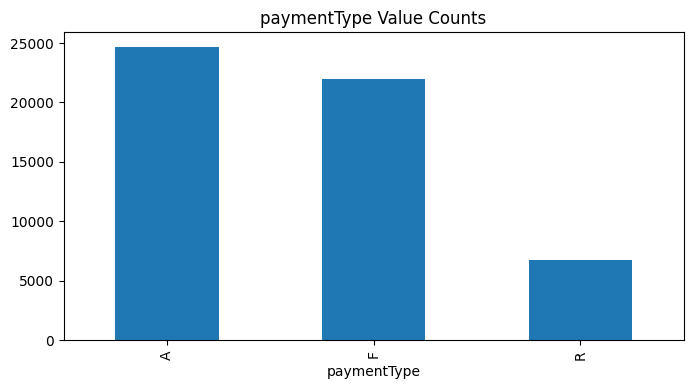

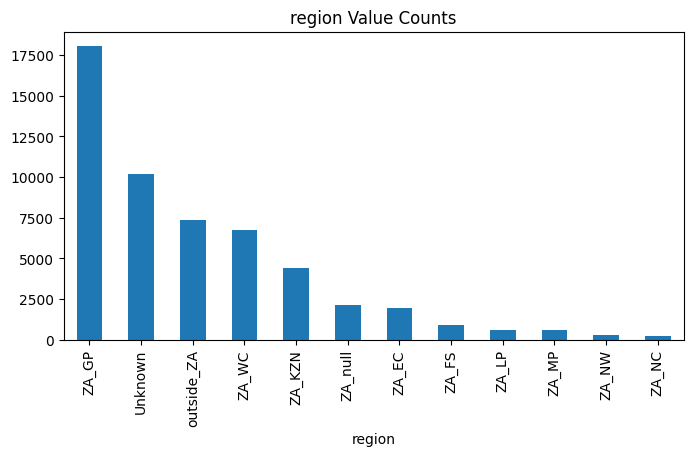

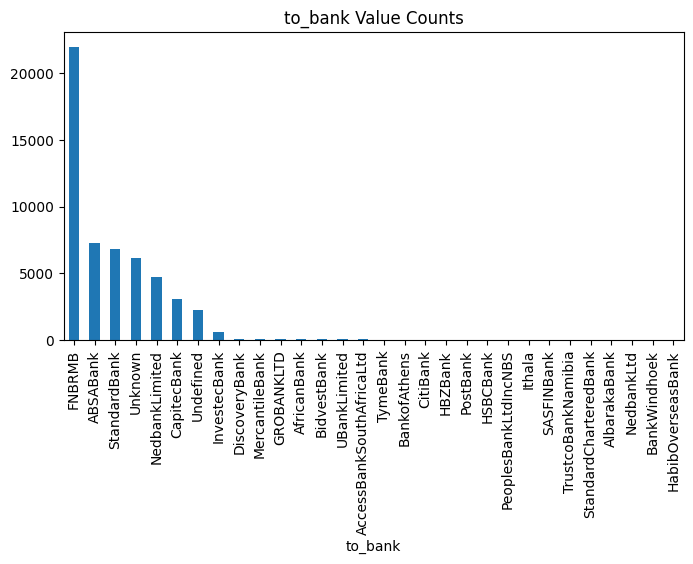

In [16]:
cat_cols = ['browser','channel','onceoff_vs_beneficiary','os','paymentType','region','to_bank']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Value Counts')

    plt.savefig(f'{col}_value_counts.png', dpi=300, bbox_inches='tight')
    
    plt.show()

## Correlation Analysis

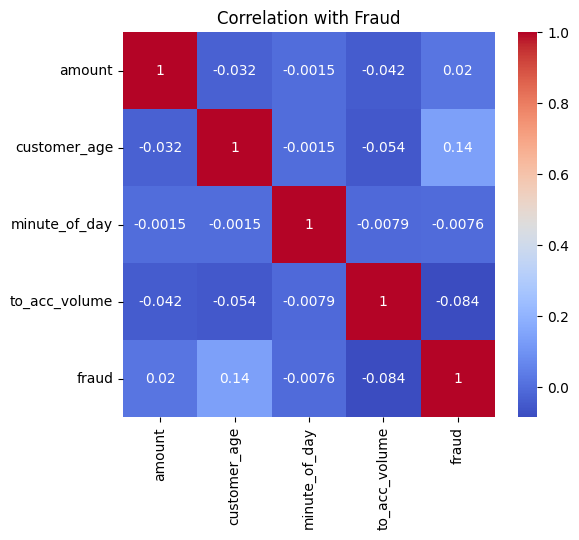

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols + ['fraud']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation with Fraud')
plt.savefig('correlation_with_fraud.png', dpi=300, bbox_inches='tight')
plt.show()

## Time-based Analysis

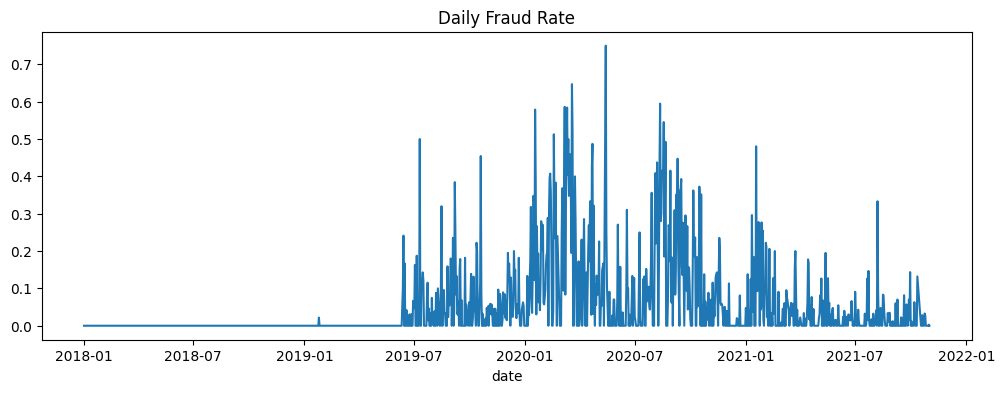

In [18]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(df['date'].dt.date)['fraud'].mean().plot(figsize=(12,4))
plt.title('Daily Fraud Rate')\

plt.savefig('daily_fraud_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# Time-based Features

In [19]:
df['txn_timestamp'] = pd.to_datetime(df['txn_timestamp'])
df['loginTime'] = pd.to_datetime(df['loginTime'])

df['hour_of_day'] = df['txn_timestamp'].dt.hour
df['day_of_week'] = df['txn_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['session_duration'] = (df['txn_timestamp'] - df['loginTime']).dt.total_seconds()

In [20]:
df.head()

,amount,browser,channel,customer_age,date,fraud,ip,isp,latitude,loginTime,...,paymentType,region,rtc_indicator,to_acc_volume,to_bank,txn_timestamp,transactor_id,hour_of_day,day_of_week,session_duration
0,120000.0,Chrome_Some(66),channel_B,51.0,2018-06-01,0.0,102.253.144.146,TelkomInternet,-29.0000,2018-06-01 19:27:21+00:00,...,F,ZA_null,0,18.0,FNBRMB,2018-06-01 19:46:21+00:00,9150237.0,19,4,1140.0
1,1250.0,Chrome_Some(89),channel_B,26.0,2021-04-07,0.0,197.89.21.227,OPTINET,-26.3811,2021-04-07 16:10:10+00:00,...,F,ZA_GP,0,21.0,FNBRMB,2021-04-07 16:13:39+00:00,13643308.0,16,2,209.0
2,200.0,Chrome_Some(75),channel_B,82.0,2019-07-31,0.0,169.0.104.125,AFRIHOSTOTHER,-26.3811,2019-07-31 14:31:35+00:00,...,F,ZA_GP,0,6.0,FNBRMB,2019-07-31 14:41:47+00:00,74589.0,14,2,612.0
3,30.0,Chrome_Some(77),channel_B,37.0,2021-04-13,0.0,34.252.239.0,Amazoncom,53.3382,2021-04-13 21:12:38+00:00,...,F,outside_ZA,0,421418.0,FNBRMB,2021-04-13 21:13:18+00:00,8776804.0,21,1,40.0
4,150.0,Chrome_Some(77),channel_B,32.0,2021-09-25,0.0,3.250.216.92,Amazoncom,53.3382,2021-09-25 21:05:45+00:00,...,F,outside_ZA,0,160201.0,FNBRMB,2021-09-25 21:06:13+00:00,7653360.0,21,5,28.0


# Customer-based Features

In [21]:
df['account_age_days'] = (pd.to_datetime(df['lut_last_paid_date']) - pd.to_datetime(df['lut_first_paid_date'])).dt.days
df['avg_payment_amount'] = df['to_acc_volume'] / (df['account_age_days'] + 1)

In [22]:
df.head()

,amount,browser,channel,customer_age,date,fraud,ip,isp,latitude,loginTime,...,rtc_indicator,to_acc_volume,to_bank,txn_timestamp,transactor_id,hour_of_day,day_of_week,session_duration,account_age_days,avg_payment_amount
0,120000.0,Chrome_Some(66),channel_B,51.0,2018-06-01,0.0,102.253.144.146,TelkomInternet,-29.0000,2018-06-01 19:27:21+00:00,...,0,18.0,FNBRMB,2018-06-01 19:46:21+00:00,9150237.0,19,4,1140.0,0.0,18.000000
1,1250.0,Chrome_Some(89),channel_B,26.0,2021-04-07,0.0,197.89.21.227,OPTINET,-26.3811,2021-04-07 16:10:10+00:00,...,0,21.0,FNBRMB,2021-04-07 16:13:39+00:00,13643308.0,16,2,209.0,130.0,0.160305
2,200.0,Chrome_Some(75),channel_B,82.0,2019-07-31,0.0,169.0.104.125,AFRIHOSTOTHER,-26.3811,2019-07-31 14:31:35+00:00,...,0,6.0,FNBRMB,2019-07-31 14:41:47+00:00,74589.0,14,2,612.0,162.0,0.036810
3,30.0,Chrome_Some(77),channel_B,37.0,2021-04-13,0.0,34.252.239.0,Amazoncom,53.3382,2021-04-13 21:12:38+00:00,...,0,421418.0,FNBRMB,2021-04-13 21:13:18+00:00,8776804.0,21,1,40.0,40.0,10278.487805
4,150.0,Chrome_Some(77),channel_B,32.0,2021-09-25,0.0,3.250.216.92,Amazoncom,53.3382,2021-09-25 21:05:45+00:00,...,0,160201.0,FNBRMB,2021-09-25 21:06:13+00:00,7653360.0,21,5,28.0,14.0,10680.066667


# Geolocation Features

In [23]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

job_lat, job_lon = -26.2041, 28.0473
df['dist_from_johannesburg'] = haversine(df['latitude'], df['longitude'], job_lat, job_lon)


# Transaction Behavior Features

In [24]:
df['high_amount_flag'] = df['amount'] > df['amount'].quantile(0.95)

df['beneficiary_flag'] = df['onceoff_vs_beneficiary'] == 'beneficiary'

In [25]:
df.head()  # Shows the first 5 rows including new features
df.columns  # Shows all column names

Index(['amount', 'browser', 'channel', 'customer_age', 'date', 'fraud', 'ip',
       'isp', 'latitude', 'loginTime', 'longitude', 'lut_first_paid_date',
       'lut_last_paid_date', 'minute_of_day', 'onceoff_vs_beneficiary', 'os',
       'paymentType', 'region', 'rtc_indicator', 'to_acc_volume', 'to_bank',
       'txn_timestamp', 'transactor_id', 'hour_of_day', 'day_of_week',
       'session_duration', 'account_age_days', 'avg_payment_amount',
       'dist_from_johannesburg', 'high_amount_flag', 'beneficiary_flag'],
      dtype='object')

# Exploratory data analysis (EDA) of your new features

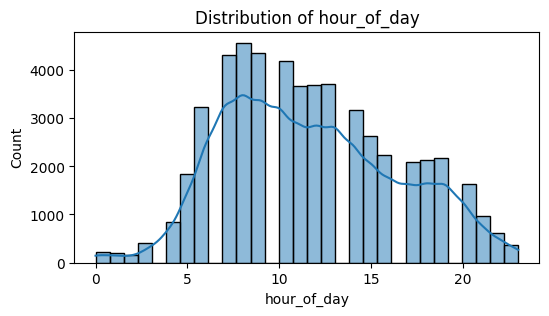

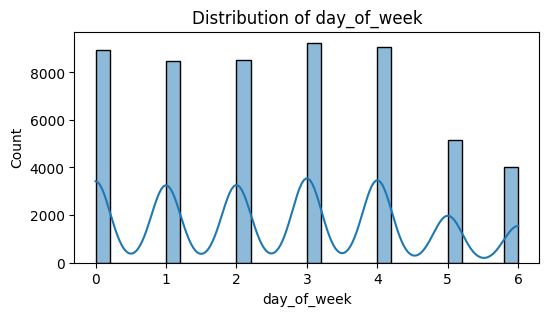

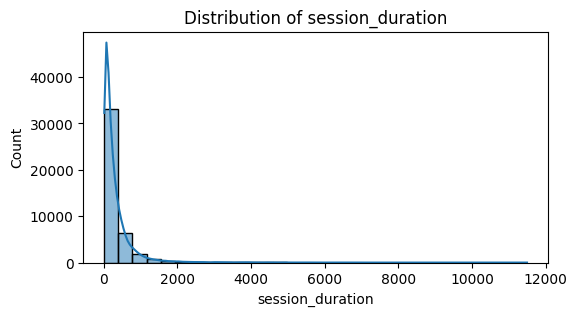

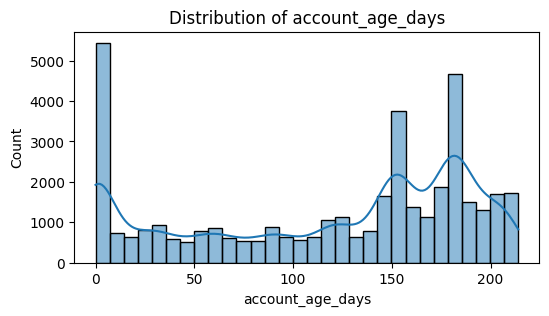

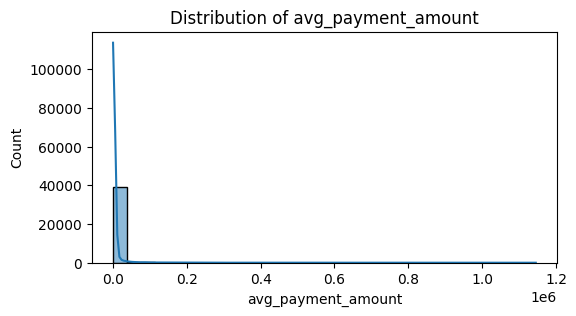

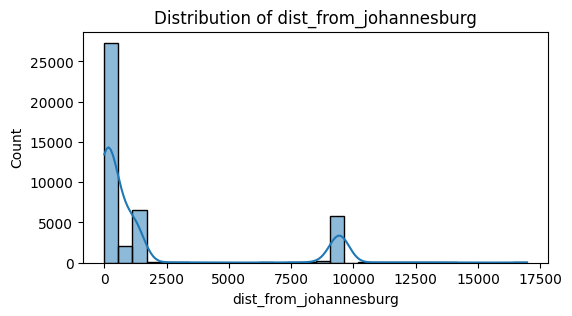

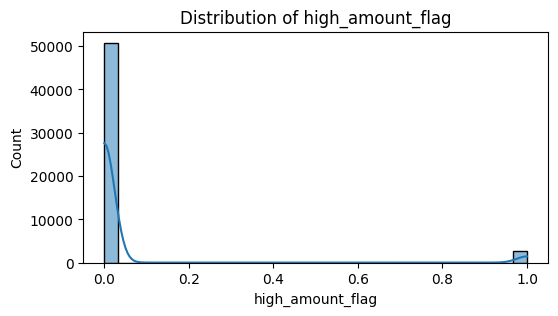

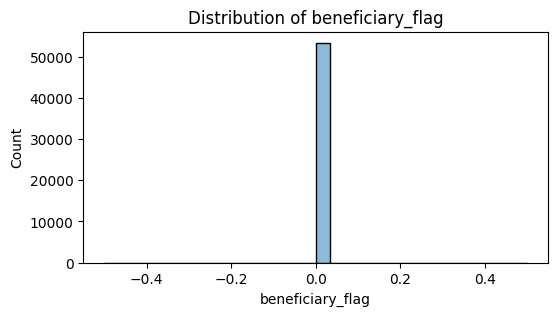

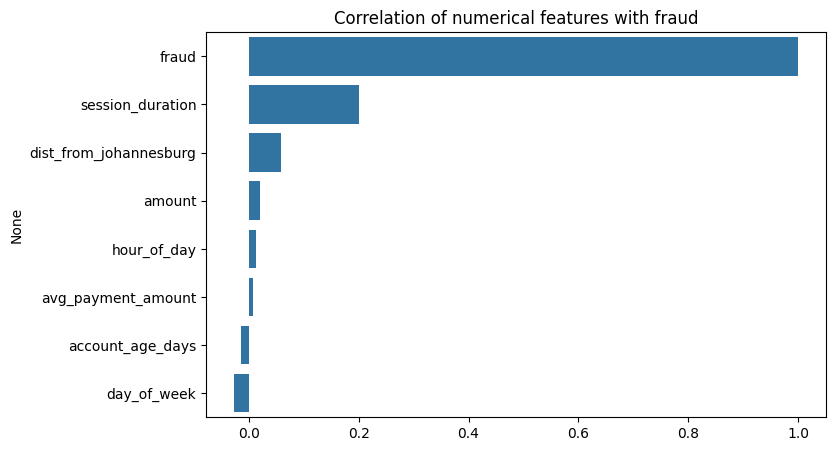


Fraud rate by high_amount_flag:
 high_amount_flag
False    0.059729
True     0.147104
Name: fraud, dtype: float64
Counts:
high_amount_flag
False    50796
True      2624
Name: count, dtype: int64



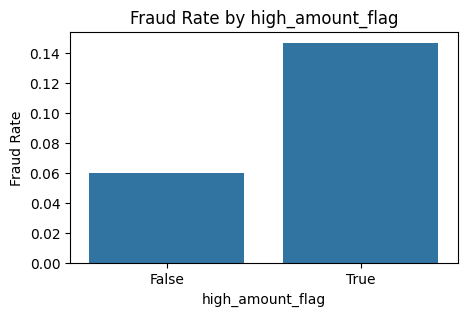


Fraud rate by beneficiary_flag:
 beneficiary_flag
False    0.064021
Name: fraud, dtype: float64
Counts:
beneficiary_flag
False    53420
Name: count, dtype: int64



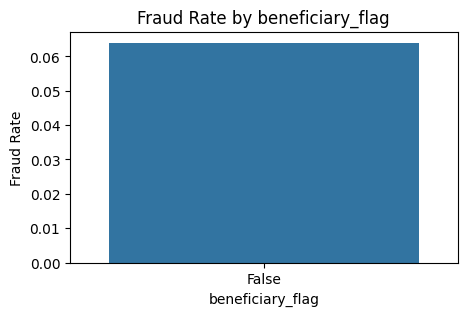

In [26]:
new_features = ['hour_of_day', 'day_of_week', 'session_duration', 
                'account_age_days', 'avg_payment_amount', 
                'dist_from_johannesburg', 'high_amount_flag', 'beneficiary_flag']

for col in new_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

numeric_cols = ['hour_of_day', 'day_of_week', 'session_duration', 
                'account_age_days', 'avg_payment_amount', 
                'dist_from_johannesburg', 'amount']

plt.figure(figsize=(8,5))
corr = df[numeric_cols + ['fraud']].corr()['fraud'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of numerical features with fraud")
plt.show()

for col in ['high_amount_flag', 'beneficiary_flag']:
    rates = df.groupby(col)['fraud'].mean()
    counts = df[col].value_counts()
    print(f"\nFraud rate by {col}:\n", rates)
    print(f"Counts:\n{counts}\n")

    plt.figure(figsize=(5,3))
    sns.barplot(x=rates.index, y=rates.values)
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.show()


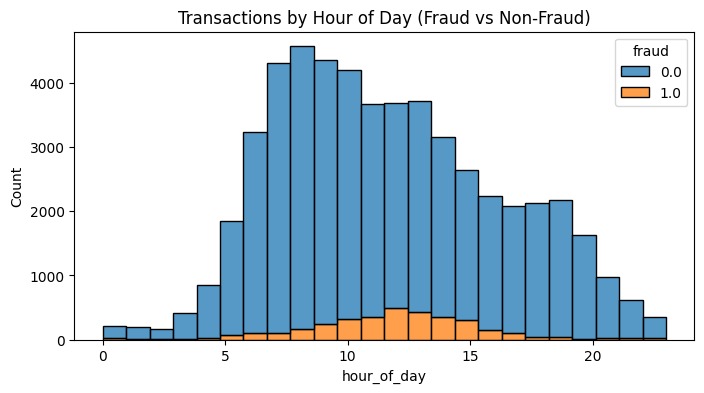

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='hour_of_day', hue='fraud', multiple='stack', bins=24)
plt.title("Transactions by Hour of Day (Fraud vs Non-Fraud)")
# Save the figure
plt.savefig("transactions_by_hour.png", dpi=300, bbox_inches='tight')
plt.show()

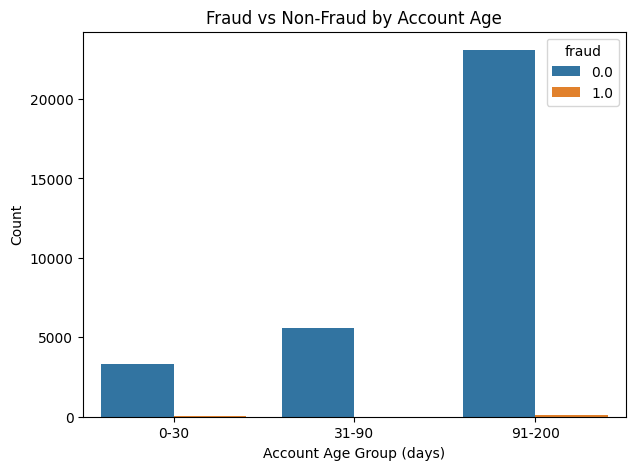

In [28]:
df['account_age_group'] = pd.cut(df['account_age_days'],
                                 bins=[0,30,90,200],
                                 labels=['0-30','31-90','91-200'])

plt.figure(figsize=(7,5))
sns.countplot(x='account_age_group', hue='fraud', data=df)
plt.title('Fraud vs Non-Fraud by Account Age')
plt.xlabel('Account Age Group (days)')
plt.ylabel('Count')

plt.savefig("Fraud_vs_Fraud_By_Account_Age.png", dpi=300, bbox_inches='tight')
plt.show()

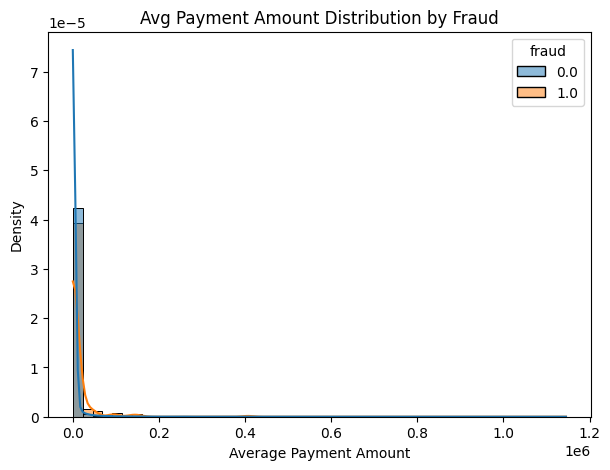

In [29]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="avg_payment_amount", hue="fraud", bins=50, kde=True, stat="density", common_norm=False)
plt.title("Avg Payment Amount Distribution by Fraud")
plt.xlabel("Average Payment Amount")
plt.ylabel("Density")
plt.show()

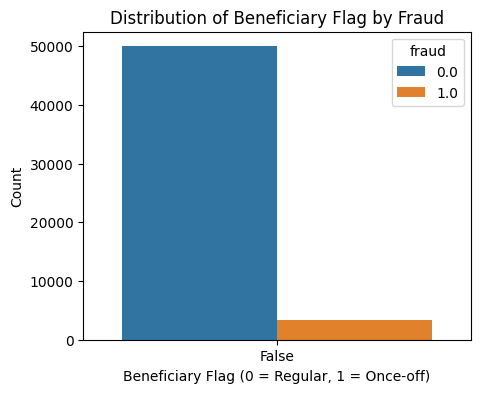

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(x="beneficiary_flag", data=df, hue="fraud")
plt.title("Distribution of Beneficiary Flag by Fraud")
plt.xlabel("Beneficiary Flag (0 = Regular, 1 = Once-off)")
plt.ylabel("Count")
plt.show()

In [31]:
df.head()

,amount,browser,channel,customer_age,date,fraud,ip,isp,latitude,loginTime,...,transactor_id,hour_of_day,day_of_week,session_duration,account_age_days,avg_payment_amount,dist_from_johannesburg,high_amount_flag,beneficiary_flag,account_age_group
0,120000.0,Chrome_Some(66),channel_B,51.0,2018-06-01,0.0,102.253.144.146,TelkomInternet,-29.0000,2018-06-01 19:27:21+00:00,...,9150237.0,19,4,1140.0,0.0,18.000000,505.605965,True,False,NaN
1,1250.0,Chrome_Some(89),channel_B,26.0,2021-04-07,0.0,197.89.21.227,OPTINET,-26.3811,2021-04-07 16:10:10+00:00,...,13643308.0,16,2,209.0,130.0,0.160305,28.712179,False,False,91-200
2,200.0,Chrome_Some(75),channel_B,82.0,2019-07-31,0.0,169.0.104.125,AFRIHOSTOTHER,-26.3811,2019-07-31 14:31:35+00:00,...,74589.0,14,2,612.0,162.0,0.036810,28.712179,False,False,91-200
3,30.0,Chrome_Some(77),channel_B,37.0,2021-04-13,0.0,34.252.239.0,Amazoncom,53.3382,2021-04-13 21:12:38+00:00,...,8776804.0,21,1,40.0,40.0,10278.487805,9444.172114,False,False,31-90
4,150.0,Chrome_Some(77),channel_B,32.0,2021-09-25,0.0,3.250.216.92,Amazoncom,53.3382,2021-09-25 21:05:45+00:00,...,7653360.0,21,5,28.0,14.0,10680.066667,9444.172114,False,False,0-30


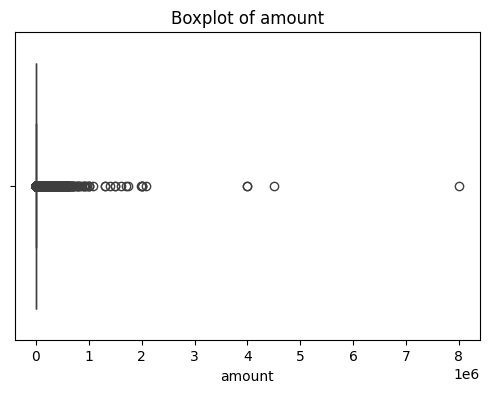

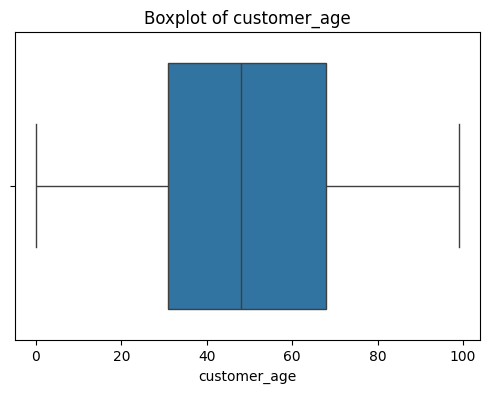

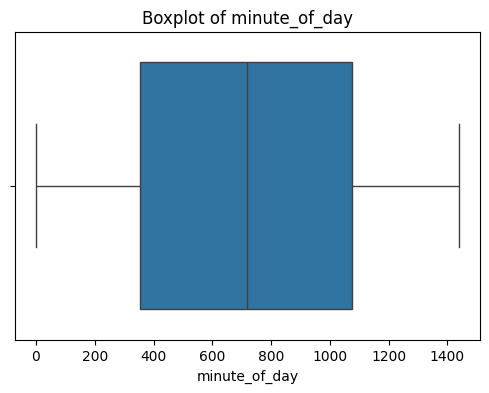

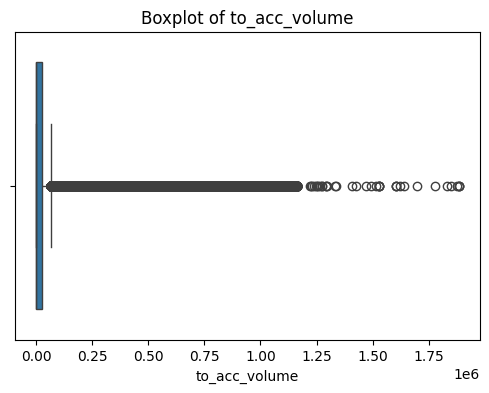

In [32]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"boxplot_{col}.png", dpi=300, bbox_inches='tight')  # Save figure
    plt.show()

# Data Modeling 

## Select features and target

In [33]:
X = df[['amount', 'customer_age', 'minute_of_day', 'to_acc_volume', 
        'session_duration', 'hour_of_day', 'day_of_week']]
# Target
y = df['fraud']

## Train-test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale numerical features

In [35]:
from sklearn.preprocessing import StandardScaler

num_cols = ['amount', 'customer_age', 'minute_of_day', 'to_acc_volume', 'session_duration']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

# Handle categorical features

In [36]:
X_train = pd.get_dummies(X_train, columns=['hour_of_day', 'day_of_week'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['hour_of_day', 'day_of_week'], drop_first=True)

# Check final dataset

In [37]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (37394, 34)
Test shape: (16026, 34)


# Building Baseline Models

## Logistic Regression

### Import libraries

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train[['session_duration']] = imputer.fit_transform(X_train[['session_duration']])
X_test[['session_duration']] = imputer.transform(X_test[['session_duration']])

### Create and train the model

In [40]:
model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Make predictions

In [41]:
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]

### Evaluate the model

In [42]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", auc)

Confusion Matrix:
 [[14993     7]
 [ 1006    20]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15000
         1.0       0.74      0.02      0.04      1026

    accuracy                           0.94     16026
   macro avg       0.84      0.51      0.50     16026
weighted avg       0.92      0.94      0.91     16026


ROC-AUC Score: 0.7844231319038336


In [43]:
print("Total dataset:", len(X))
print("Training set:", len(X_train))
print("Test set:", len(X_test))

print("\nFraud counts in training set:")
print(y_train.value_counts())

print("\nFraud counts in test set:")
print(y_test.value_counts())

Total dataset: 53420
Training set: 37394
Test set: 16026

Fraud counts in training set:
fraud
0.0    35000
1.0     2394
Name: count, dtype: int64

Fraud counts in test set:
fraud
0.0    15000
1.0     1026
Name: count, dtype: int64


## Decision Tree Model

### Train Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:,1]

### Evaluate

In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Confusion Matrix:
 [[14917    83]
 [  470   556]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     15000
         1.0       0.87      0.54      0.67      1026

    accuracy                           0.97     16026
   macro avg       0.92      0.77      0.82     16026
weighted avg       0.96      0.97      0.96     16026


ROC-AUC Score: 0.921346848602989


## Random Forest Model

Confusion Matrix:
 [[14931    69]
 [  357   669]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     15000
         1.0       0.91      0.65      0.76      1026

    accuracy                           0.97     16026
   macro avg       0.94      0.82      0.87     16026
weighted avg       0.97      0.97      0.97     16026


Accuracy: 0.9734181954324224

Random Forest ROC-AUC: 0.9699359974009096


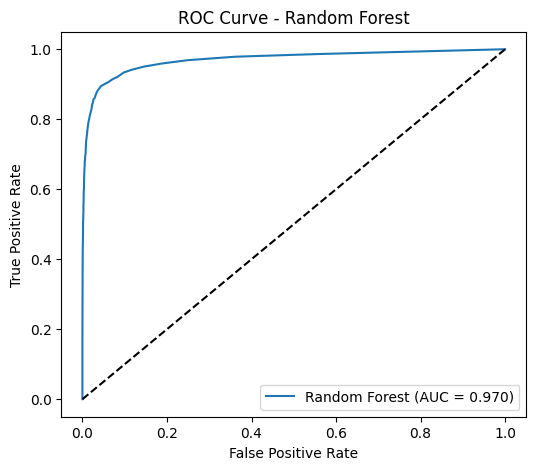

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, digits=2)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Confusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", cr_rf)
print("\nAccuracy:", acc_rf)

y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\nRandom Forest ROC-AUC:", roc_auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()